# 帕累托分布

## 基本概念

帕累托分布是描述**极端不平等**现象的核心工具，是一种重要的**长尾分布**，其幂律特性在互联网、经济、社会科学中广泛应用。与对数正态分布相比，更适合建模**超级极端事件**（如用户行为、收入分布、流量分配）。
- **定义**：描述**幂律现象**（Power Law）的连续概率分布，适用于“**少数占据大多数**”的场景（如用户行为、收入分布、流量分配）。
- **核心特性**： 
    - **厚尾性**：极端值出现概率高于正态/对数正态分布。
    - **尺度不变性**：无论观察尺度如何，分布形态相似。
- **互联网AB实验中的典型应用**： 
    - **用户行为建模**
        - **场景**：用户活跃度、消费金额、停留时长等。
        - **案例**： 
            - 实验组和对照组的**高价值用户占比**对比（如Top 1%用户的贡献差异）。
            - 检测策略是否加剧/缓解**马太效应**（如推荐算法是否导致头部内容更集中）。
    - **流量分配优化**
        - **场景**：在推荐系统中，内容曝光量的分布。
        - **案例**： 
            - AB测试不同推荐策略下的**曝光长尾程度**（$\alpha$值变化）。
            - 通过KS检验比较两组流量分布是否显著不同。
    - **异常值分析**
        - **场景**：识别实验中的极端异常值（如刷单用户）。
        - **方法**： 
            - 拟合帕累托分布，定义$x > x_m \cdot k$为异常（$k$由分位数决定）。

## 概率密度函数

设$X \sim \text{Pareto}(x_m, \alpha)$，
其概率密度函数为：
$$f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha + 1}} \quad \text{（} x \geq x_m > 0 \text{）}$$
其中，
- $x_m$（尺度参数）：最小值阈值（如最低收入）。
    - $x_m$是帕累托分布的 下界控制参数
    - 例如：需要建模订单金额，若所有订单都不小于10元，那么$x_m=10$
- $\alpha$（形状参数）：控制尾部厚度（$\alpha越小$，尾部越厚）。

## 均值与方差

**均值：**

$$E(X)=\frac{\alpha x_m}{\alpha - 1}, \alpha > 1$$

**方差：**
$$D(X)=\frac{x_m^2 \alpha}{(\alpha-1)^2 (\alpha-2)}, \alpha > 2$$


## 性质

- **幂律尾部**：$P(X > x) \sim x^{-\alpha}$（超越概率衰减缓慢）。
    - 描述帕累托分布的尾部衰减规律：随着$x$增大，尾部以幂律形式缓慢衰减
    - 尾部下降缓慢，极端大值频率显著高于正态、对数正态、指数分布
    - 因此帕累托分布适用于建模富豪财富、点击次数、交易金额、用户活跃度等“极端事件”
- **80-20法则**：当$\alpha \approx 1.16$ 时，Top 20%占据80%资源。
    - 帕累托分布数学上解释了**“少数占多数”**的现象

## 图形

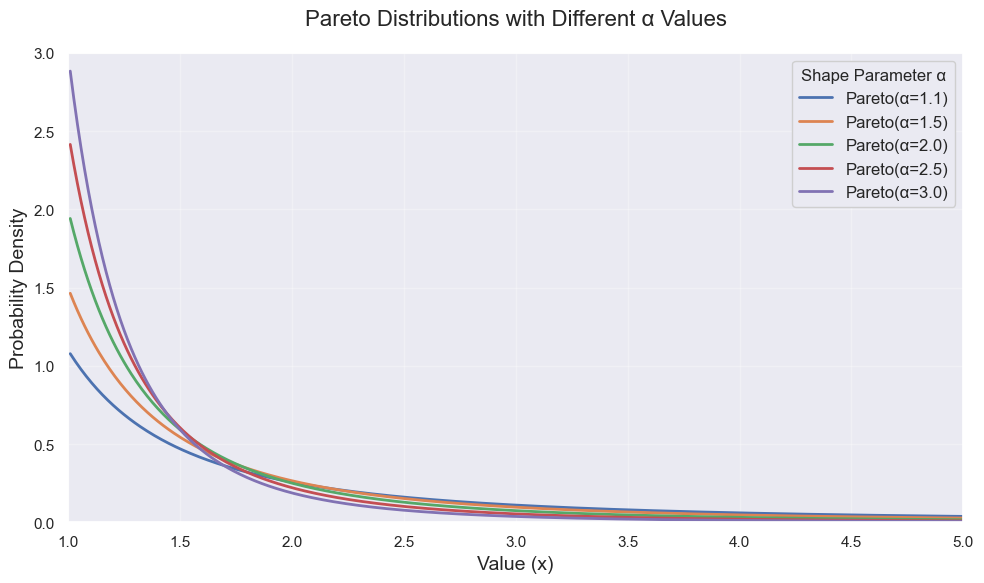

In [3]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto  # 用于帕累托分布
import seaborn as sns  # 用于图形美化

# ========== 图表全局设置 ==========
sns.set(style="darkgrid")  # 使用深色网格背景

# ========== 分布参数定义 ==========
# Pareto 分布参数：α（shape parameter）
# xm 固定为 1.0（scale参数，对应最小值）
shape_params = [1.1, 1.5, 2.0, 2.5, 3.0]  # 越小尾部越重

# ========== x轴数据 ==========
# x 从略大于 x_m 开始（避免除以0）
x = np.linspace(1.01, 5, 500)

# ========== 绘图设置 ==========
plt.figure(figsize=(10, 6))  # 设置画布大小

# 循环绘制不同 α 值的帕累托分布
for alpha in shape_params:
    y = pareto.pdf(x, b=alpha, scale=1.0)  # xm=1 固定
    plt.plot(
        x, y,
        linewidth=2,
        label=f'Pareto(α={alpha})'
    )

# ========== 图表修饰 ==========
plt.title(
    'Pareto Distributions with Different α Values',
    fontsize=16,
    pad=20
)
plt.xlabel('Value (x)', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)

plt.legend(
    title='Shape Parameter α',
    fontsize=12,
    framealpha=0.9
)

plt.grid(alpha=0.3)
plt.xlim(1, 5)
plt.ylim(0, 3.0)

plt.tight_layout()
plt.show()

- 所有曲线从$x = 1$开始（因为$x_m = 1$） 
- $\alpha$越小，曲线尾部越长、下降越慢（尾更重） 
- $\alpha$越大，分布越集中，曲线下降更快 

# 与其他分布的关系

## 与指数分布
帕累托是指数分布在乘法过程下的“幂律变体” 

转换方式：
- 若$Y \sim \text{Exp}(\lambda)$，则$X = x_m e^Y \sim \text{Pareto}(x_m, \alpha = \lambda) $
 
背后逻辑是：
- 指数分布建模 加法过程
- 帕累托建模 乘法增长过程